In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS

import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS

#DEFINING PRETRAINED RESNET50 WITH BASE IMAGENET WEIGHTS
resnet50Transferred = Sequential()

preTrainedResnet50= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in preTrainedResnet50.layers:
        layer.trainable=False

#TRANSFER LEARNING USING RESNET 50
resnet50Transferred.add(preTrainedResnet50)
resnet50Transferred.add(Flatten())
resnet50Transferred.add(Dense(512, activation='relu'))
resnet50Transferred.add(Dense(2, activation='softmax'))

#LOADING DATASET
# DATASET LINK : https://www.kaggle.com/datasets/tongpython/cat-and-dog
trainDataSet = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/IOT/cats_dogs/trainingData/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180))
validationDataSet = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/IOT/cats_dogs/validationData',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180))

#PRINTING CLASS NAMES
classNames = trainDataSet.class_names
print("CLASS NAMES")
for className in classNames:
    print(className)

Found 8008 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
CLASS NAMES
cats
dogs


In [22]:
resnet50Transferred.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
trainingHistory = resnet50Transferred.fit(
  trainDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/10
251/251 [==============================] - 39s 129ms/step - loss: 0.0313 - accuracy: 0.9891 - val_loss: 0.1126 - val_accuracy: 0.9703
Epoch 2/10
251/251 [==============================] - 33s 127ms/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.1466 - val_accuracy: 0.9624
Epoch 3/10
251/251 [==============================] - 27s 106ms/step - loss: 0.0192 - accuracy: 0.9925 - val_loss: 0.1413 - val_accuracy: 0.9689
Epoch 4/10
251/251 [==============================] - 32s 126ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.1693 - val_accuracy: 0.9679
Epoch 5/10
251/251 [==============================] - 28s 108ms/step - loss: 0.0160 - accuracy: 0.9939 - val_loss: 0.1418 - val_accuracy: 0.9698
Epoch 6/10
251/251 [==============================] - 28s 109ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.1629 - val_accuracy: 0.9684
Epoch 7/10
251/251 [==============================] - 28s 109ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1420 - val_ac

1/1 [==============================] - 1s 988ms/step
PREDICTED CLASS :  CATS


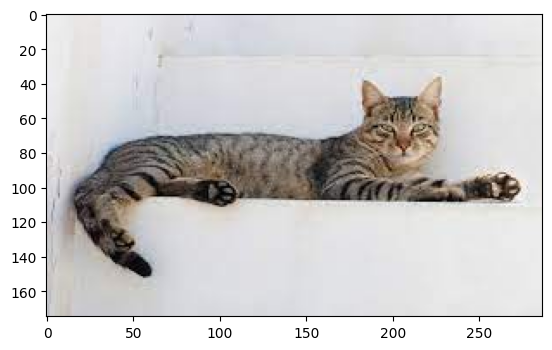

In [23]:
testImage = cv2.imread('/content/drive/MyDrive/IOT/cats_dogs/testImage1.jpg')
#UPLOAD IMAGE TO COLAB RUN TIME
temp = testImage[:,:,::-1]
plt.imshow(temp)
testImage = cv2.resize(testImage , (180,180))
testImage = preprocess_input(testImage)
#PREDICT USING BASE WEIGHTS
predictions = resnet50Transferred.predict(np.array([testImage]))[0]
#ASSIGN CLASS NAME
#ASSIGN CLASS NAME
outputClass=classNames[np.argmax(predictions)]
print("PREDICTED CLASS : ", outputClass.upper())

1/1 [==============================] - 0s 37ms/step
PREDICTED CLASS :  DOGS


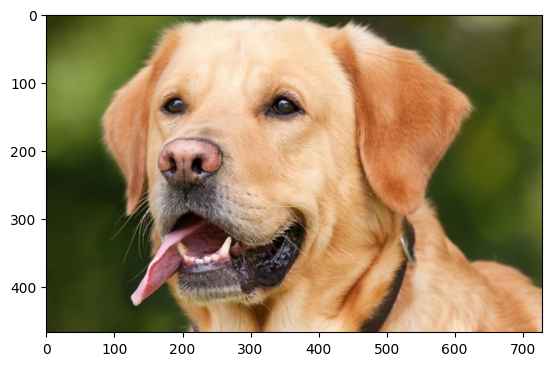

In [24]:
testImage = cv2.imread('/content/drive/MyDrive/IOT/cats_dogs/testImage2.png')
#UPLOAD IMAGE TO COLAB RUN TIME
temp = testImage[:,:,::-1]
plt.imshow(temp)
testImage = cv2.resize(testImage , (180,180))
testImage = preprocess_input(testImage)
#PREDICT USING BASE WEIGHTS
predictions = resnet50Transferred.predict(np.array([testImage]))[0]
#ASSIGN CLASS NAME
#ASSIGN CLASS NAME
outputClass=classNames[np.argmax(predictions)]
print("PREDICTED CLASS : ", outputClass.upper())

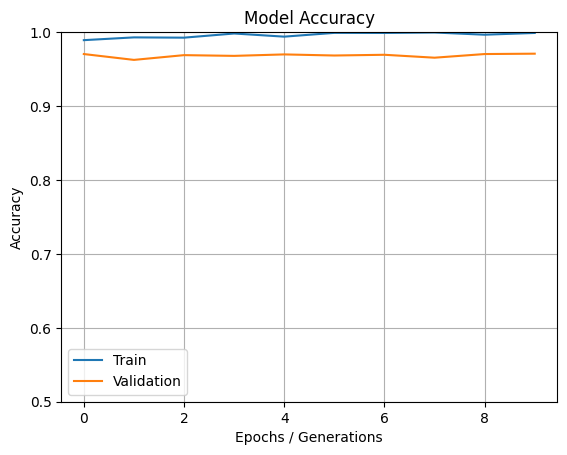

In [25]:
fig = plt.gcf()
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])
plt.axis(ymin=0.5,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs / Generations')
plt.legend(['Train', 'Validation'])
plt.show()

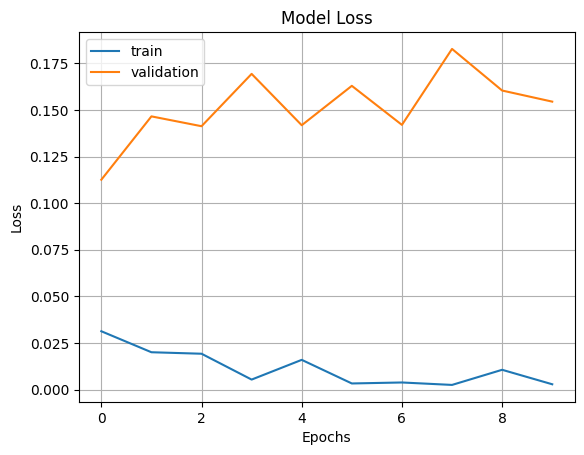

In [27]:
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()